In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load the dataset
df = pd.read_csv('UsArrests.csv', index_col=0)

# look at the dataset
df.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.200,236,58,21.200
Alaska,10.000,263,48,44.500
Arizona,8.100,294,80,31.000
Arkansas,8.800,190,50,19.500
California,9.000,276,91,40.600


In [176]:
# Understand more about our data
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000,50.000,50.000,50.000
mean,7.788,170.760,65.540,21.232
std,4.356,83.338,14.475,9.366
min,0.800,45.000,32.000,7.300
25%,4.075,109.000,54.500,15.075
50%,7.250,159.000,66.000,20.100
75%,11.250,249.000,77.750,26.175
max,17.400,337.000,91.000,46.000


In [177]:
# Count missing values
missing = df.isnull().sum()
missing

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [178]:
#understand datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


Looking at the datatypes and sum of null values; we can see that since the null sum for all rows are null and we can see the data
types are float and int; i.e. no object so we know there is no missing values and we do not need to do any imputation.

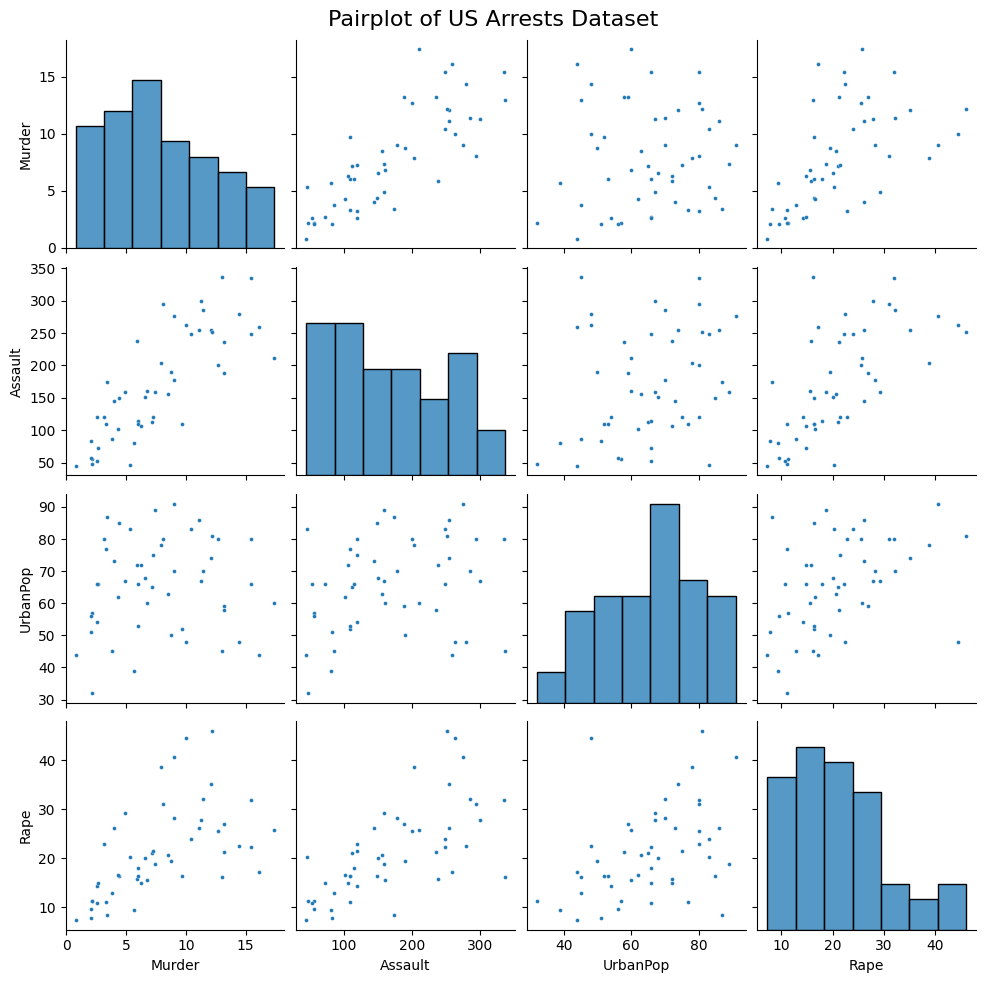

In [179]:
sns.pairplot(df, plot_kws={"s": 8})
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairplot of US Arrests Dataset", fontsize=16)
plt.show()

Above is a matrix of scatter plots and histograms for each pair of variables in the dataset.

We can start to identify potential patterns or relationships between variables. 
For example, there appears to be a strong positive correlation between the Murder and Assault variables, 
as well as between Murder and Rape. 
The UrbanPop variable does not appear to have a strong correlation with any of the other variables. 
We will also complete a correlation analysis to further explore this.

The plots along the diagonal of the pairplot show the distribution of each variable. 
The Murder and Rape variable appears to have a right-skewed distributions, while the UrbanPop variable has a roughly normal distribution. The Assault variable appears to also have a very slight right-skewed distribution

#### Correlation Analysis

          Murder  Assault  UrbanPop  Rape
Murder     1.000    0.802     0.070 0.564
Assault    0.802    1.000     0.259 0.665
UrbanPop   0.070    0.259     1.000 0.411
Rape       0.564    0.665     0.411 1.000


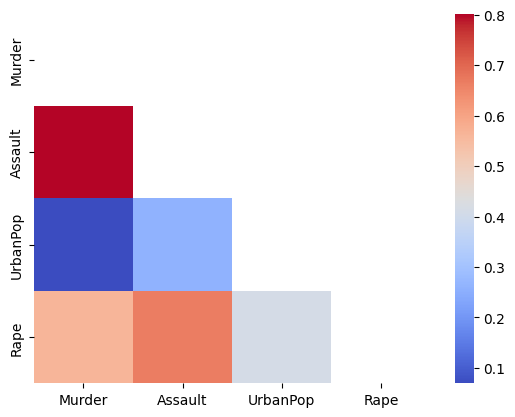

In [180]:
corr_df = df.corr()
mask_ut=np.triu(np.ones(corr_df.shape)).astype(bool)
sns.heatmap(corr_df, mask=mask_ut, cmap="coolwarm")
print(corr_df)

This heatmap illustrates the correlation between different variables in the UsArrests dataset. 

Murder and Assault have a strong positive correlation of 0.801873, suggesting that as the number of murders increases in a state, so does the number of assaults.
Likewise, Rape and Assault also have a strong positive correlation of 0.665241.

UrbanPop has a weak positive correlation with Murder (0.069573), Assault (0.258872), and Rape (0.411341), pointing to a slight tendency for these crimes to occur more frequently in states
with higher urban populations, but the correlation is really not very strong.

In general, this heatmap gives us an idea of how these variables are related to each other. Correlation does however not imply causation, and further analysis would be needed to determine the causal relationships between these variables.

### PCA

In [181]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = df.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [182]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca)
df_pca.head()

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


In [183]:
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")

Standard deviation: [1.5908673  1.00496987 0.6031915  0.4206774 ]


A higher standard deviation designate more variability in the data along that principal component, 
while a lower standard deviation designate less variability.

The first principal component (PC1) has the highest standard deviation (1.59), indicating that it captures 
the most variability in the dataset.
The second principal component (PC2) has a standard deviation of 1.00, therefore it captures less variability 
than the first but still has a sizable impact on the data. 
The third (PC3) and fourth principal components (PC4) have even lower standard deviations,
suggesting that they capture relatively less variability in the data compared to the first two principal components.

In [184]:
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [0.62006039 0.24744129 0.0891408  0.04335752]


PC1 explains 62.01% of the variance in the dataset,  PC2 explains 24.74%,
PC3 explains 8.91%, and PC4 explains 4.34%. Together, accounting for a total of 100% of the variance in the dataset.

In general we want to keep enough PC to explain a high % of the variance in the original dataset, while keeping the
number of components as small as possible; in order to avoid overfitting or too much complexity in the analysis.


In [185]:
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [2.53085875 3.5408232  3.90466318 4.08163265]


The first value in the array (2.53) represents the proportion of variance explained by PC1.
3.54 represents the cumulative proportion of variance explained by PC1 and PC2, and so on.

In [186]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see more decimal places

pc1 = abs(pca.components_[0]) #components x features - access at index 0 to get the first component
pc2 = abs(pca.components_[1])
pc3 = abs(pca.components_[2])
pc4 = abs(pca.components_[3])

feat_names = df.columns.tolist() 
feat_df = pd.DataFrame()
feat_df["Features"] = feat_names
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df["PC3 Importance"] = pc3
feat_df["PC4 Importance"] = pc4
feat_df

# Adapted from L3T12

,Features,PC1 Importance,PC2 Importance,PC3 Importance,PC4 Importance
0,Murder,0.536,0.418,0.341,0.649
1,Assault,0.583,0.188,0.268,0.743
2,UrbanPop,0.278,0.873,0.378,0.134
3,Rape,0.543,0.167,0.818,0.089


The code above computes the feature importance for the first two principal components of 
a PCA analysis performed on the US arrests data. 

Feature importance is used in machine learning to identify the most important features that contribute the most to the
outcome of a model. 


PC1: Murder, Assault, and Rape have similar importance scores (0.536, 0.583, and 0.543), suggesting that murder, assault, and Rape are highly correlated with each other
    and contribute similarly to the variation explained by PC1. 
    UrbanPop has a lower importance score (0.278), indicating that it is less important for explaining the variation captured by PC1.
    

PC2: UrbanPop has a very high importance score (0.873), indicating that it is the primary variable contributing to the variation captured by PC2. 
    Murder, Assualt, and Rape have much lower importance scores (0.418, 0.188, and 0.167), indicating that they are less important for explaining the variation captured by PC2
    
PC3: Rape has the highest importance score (0.818), followed by Murder (0.341) and UrbanPop (0.378). Assault the lowest importance score (0.268), indicating that it is less important for explaining the variation captured by PC3.

PC4: UrbanPop has the highest importance score (0.649), followed by Murder (0.536) and Assault (0.743). Rape has a much lower importance score (0.089), indicating that it is less important for explaining the variation captured by PC4.

Text(0.5, 1.0, 'Cumulative Explained Variance')

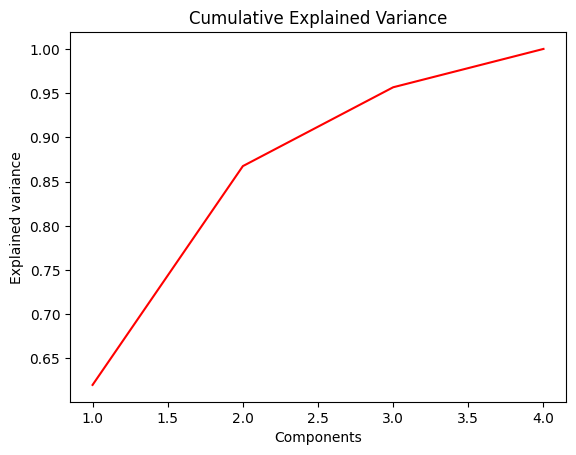

In [187]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

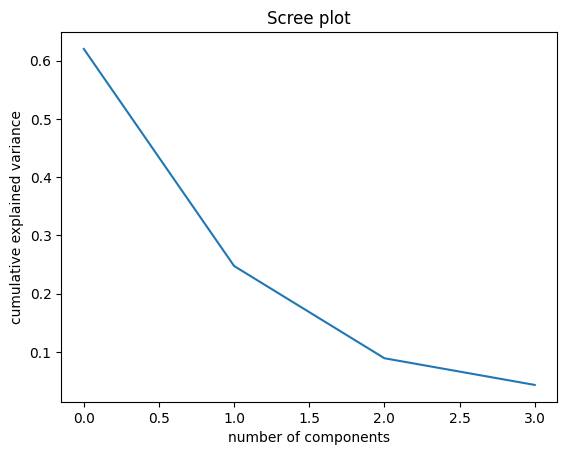

In [188]:
# Scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

The first 2 principal components together explain above 85% of the variance in the dataset. 
These graphs just assist in showing this; looking at the feature importance and proportions of variance similarly leads to this 
conclusion. 
Considering that we only have 4 variables in the entire dataset and that the remaining 2 only explain less than 15% of the 
variance; We use PC1 and PC2 to perform cluster analysis.

In [189]:
pca_df = pd.DataFrame(X_pca[:, 0:2], index = df.index)
pca_df.head()

,0,1
City,,
Alabama,0.986,1.133
Alaska,1.950,1.073
Arizona,1.763,-0.746
Arkansas,-0.141,1.120
California,2.524,-1.543


## Hierarchical clustering

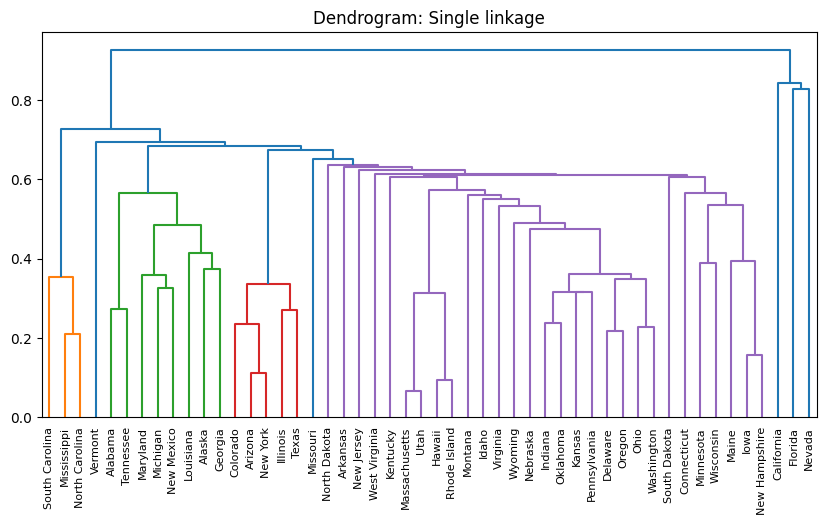

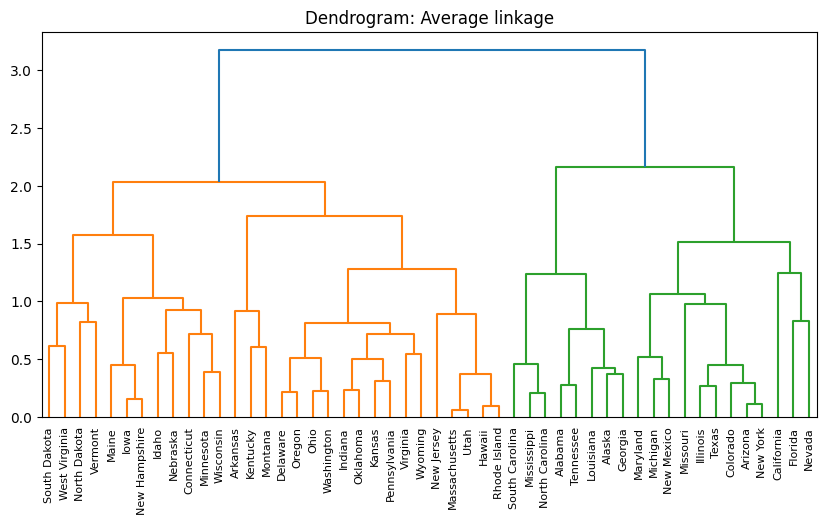

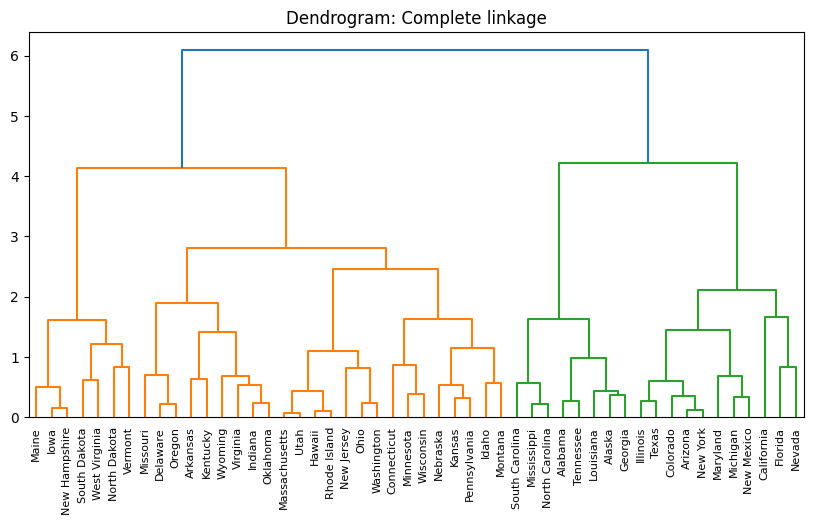

In [190]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)

# Single linkage hierarchical clustering
plt.figure(figsize=(10, 5))
plt.title("Dendrogram: Single linkage")
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index)
plt.show()

# Average linkage hierarchical clustering
plt.figure(figsize=(10, 5))
plt.title("Dendrogram: Average linkage")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index)
plt.show()

# Complete linkage hierarchical clustering
plt.figure(figsize=(10, 5))
plt.title("Dendrogram: Complete linkage")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)
plt.show()

### K-means clustering

In [191]:
#create abbreviations for cities to simplify plots
# create a dictionary of city abbreviations
city_abbr = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

C:\Users\grobb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'PC2')

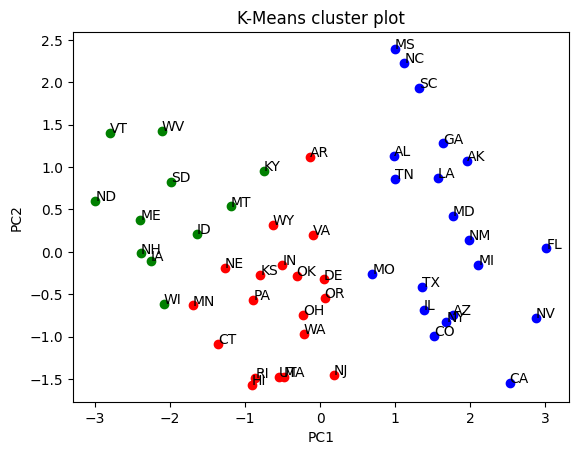

In [192]:
from sklearn.cluster import KMeans

# We extract the first two components
x = X_pca[:,0]
y = X_pca[:,1]

# Fit k-means
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 
    
# add city abbreviations to the plot 
for i, city in enumerate(df.index):
    plt.annotate(city_abbr[city], (pca_df.iloc[i, 0], pca_df.iloc[i, 1]))

    
ax.set_title("K-Means cluster plot")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

#Adapted from L3T12

In [193]:
print('Abbreviations in graph:')
for key, value in city_abbr.items():
    print(key, ":", value)

Abbreviations in graph:
Alabama : AL
Alaska : AK
Arizona : AZ
Arkansas : AR
California : CA
Colorado : CO
Connecticut : CT
Delaware : DE
Florida : FL
Georgia : GA
Hawaii : HI
Idaho : ID
Illinois : IL
Indiana : IN
Iowa : IA
Kansas : KS
Kentucky : KY
Louisiana : LA
Maine : ME
Maryland : MD
Massachusetts : MA
Michigan : MI
Minnesota : MN
Mississippi : MS
Missouri : MO
Montana : MT
Nebraska : NE
Nevada : NV
New Hampshire : NH
New Jersey : NJ
New Mexico : NM
New York : NY
North Carolina : NC
North Dakota : ND
Ohio : OH
Oklahoma : OK
Oregon : OR
Pennsylvania : PA
Rhode Island : RI
South Carolina : SC
South Dakota : SD
Tennessee : TN
Texas : TX
Utah : UT
Vermont : VT
Virginia : VA
Washington : WA
West Virginia : WV
Wisconsin : WI
Wyoming : WY


The K-means cluster plot provides a visual representation of how the cities are grouped into three distinct clusters - green, red, and blue. The list of abbreviations of city names is also printed to allow for easy identification of the cities on the plot.

Looking at the feature importance scores, we can see that Murder, Assault, and Rape have higher importance scores in PC1, indicating that these features contribute more to the variation captured by PC1 than UrbanPop. In PC2, UrbanPop has the highest importance score, followed by Rape.

The green cluster is characterized by low PC1 values and moderate PC2 values, which suggests that cities in this cluster are less likely to have high rates of murder, assault, and rape. The PC2 scores for the green cluster are moderate, indicating that these cities may have a higher urban population compared to the red cluster.

The red cluster has moderate PC1 and PC2 values, suggesting that the cities in this cluster have moderate rates of crime and urban population.

Lastly, the blue cluster has the highest PC1 scores, indicating that cities in this cluster have relatively high values for murder, assault, and rape compared to other feature (Urbanpop) in the dataset. The PC2 scores for the blue cluster vary and range from low to high, indicating that the cities in this cluster have varying levels of urban population.